In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2-4*x+5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5,5,0.25)

In [5]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)

In [7]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

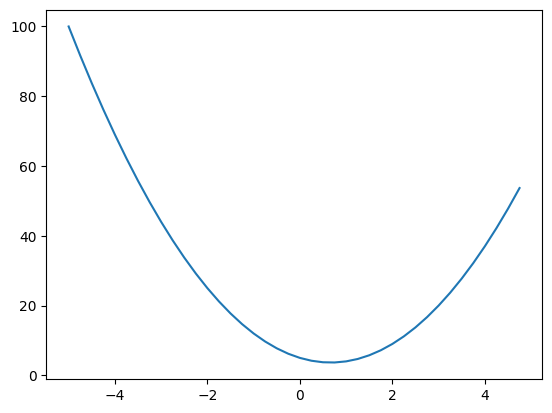

In [8]:
plt.plot(xs,ys)

In [9]:
h = 0.001
x = 3 
(f(x+h)-f(x))/h

14.00300000000243

In [10]:
# inputs 
a = 2
b = -3
c = 10

h = 0.0001

d1 = a*b + c
c += h
d2 = a*b +c 

print("d1", d1)
print("d2", d2)
print("slope", (d2-d1)/h)


d1 4
d2 4.0001
slope 0.9999999999976694


### Class Value

In [10]:
class Value:
    def __init__(self, data, _children=(), _op ="", label =""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out

    def tanh(self):
        x = self.data 
        out = Value((math.exp(2*x)-1)/(math.exp(2*x)+1), (self,), "tanh")
        return out

In [9]:
math.exp(2)

7.38905609893065

In [4]:
a = Value(2, label = "a")
b = Value(-3, label ="b")
e = a*b; e.label = "e"
c = Value(10, label = "c")

d = e+c; d.label = 'd'
f = Value(-2.0, label = "f")
L = d*f; L.label = "L"
# as we have defined the double underscore functions we can just do a*b+c  instead of 
#a.__mul__(b).__add__(c)

In [24]:
d._prev

{Value(data=-6), Value(data=10)}

In [25]:
d._op

'+'

In [12]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    nodes, edges = trace(root)

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

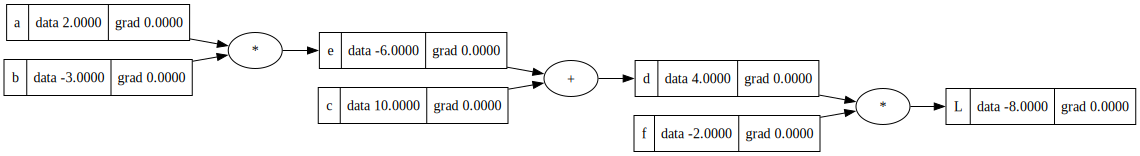

In [8]:
draw_dot(L)

### Building a Neuron and back propograting manually

In [17]:
# inputs to the neuron
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")
# weigths of the neuron 
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of the neuron 
b = Value(6.8813735870195432, label = "b")

# forward pass of nueron(x1w1 + x2w2 +b)
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1+x2w2"
n = x1w1x2w2 + b; n.label = "n"

#activation funtion tanh 
o = n.tanh() ; o.label = "o"

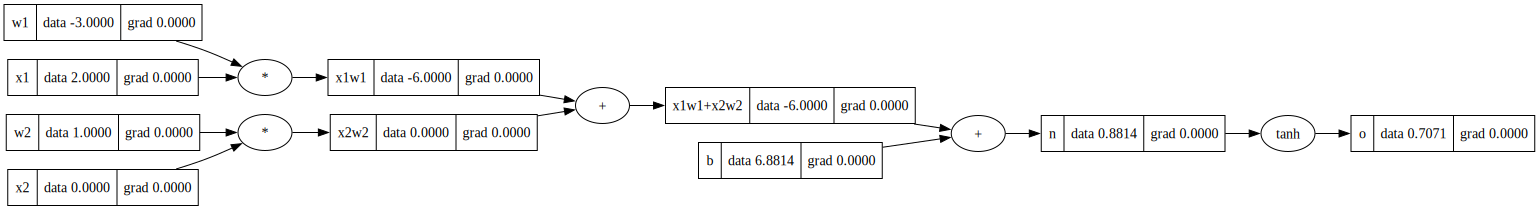

In [18]:
draw_dot(o)

In [24]:
# manual backpropogation 

# o = tanh(n)
# do/dn = 1-tanh(n)**2 
# do/dn = 1-o**2
n.grad = 1 - o.data**2

#grads
o.grad = 1
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5

x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data
x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data


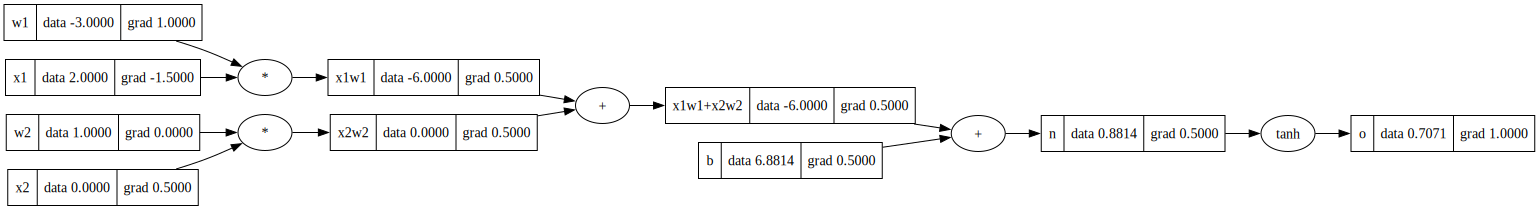

In [25]:
draw_dot(o)